# 2D Ising model simulation for thermodynamic efficiency

Computing and visualize thermodynamic efficiency using simulation data from 2D Ising model at equilibrium. Simulation scripts refer to scripts/.


In [11]:
%matplotlib widget
# need to pip install ipympl for interactive plots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # for legend
from matplotlib import cm # for 3D plot
from matplotlib.ticker import LinearLocator, FormatStrFormatter, StrMethodFormatter # for 3D plot
import json # for exporting intermediate results
from ising2D.core import compute_eta2D_cov, compute_eta2D_fisher, compute_eta2D_derv # import core functions

# Constants
CRITICAL_VALUE = np.log(1+2**0.5)/2 # critical value for J ~ 0.44

# Plot setting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cmr10'  # Use the Computer Modern Roman font
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern for math text
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.labelsize'] = 16  # Axis labels
plt.rcParams['axes.titlesize'] = 20  # Title
plt.rcParams['xtick.labelsize'] = 14 # X tick labels
plt.rcParams['ytick.labelsize'] = 14 # Y tick labels
# plt.rcParams['legend.fontsize'] = 12 # Legend
plt.rcParams['axes.unicode_minus'] = False

colors = {
    'red': '#B73B39',
    'blue': '#0065A8',
    'yellow': '#C8932B',
    'olive': '#9ca346',
    'green': '#7ea364',
    'teal': '#6ea48b',
    'cyan': '#659faf',
    'purple': '#9c5990',
    'orange': '#d37c60',
    'brown': '#8d6f5f'
}

In [2]:
# Plotting functions

def plot_3d_eta(eta, hs, Js, title, zlabel):
    HS, JS = np.meshgrid(hs, Js, indexing='ij')
    Z = eta  

    fig = plt.figure(figsize=(6.2, 5.2), constrained_layout=True)
    ax = fig.add_subplot(111, projection="3d")

    # Surface
    surf = ax.plot_surface(
        HS, JS, Z,
        cmap=cm.viridis,
        linewidth=0.2, antialiased=True,
        rstride=1, cstride=1,
        shade=True,  # uses Gouraud under the hood
        # norm=LogNorm(vmin=np.nanmin(Z[Z>0])*0.9, vmax=np.nanmax(Z))  # optional log color
    )

    # # Optional: contour projection on xy-plane (at z=min)
    # zmin = np.nanmin(Z)
    # ax.contourf(HS, JS, Z, 18, zdir='z', offset=zmin, cmap=cm.viridis, alpha=0.7)

    # Axes styling
    ax.view_init(elev=28, azim=-55)
    ax.set_xlabel(r"$h$", labelpad=8, fontsize=18)
    ax.set_ylabel(r"$J$", labelpad=8, fontsize=18)
    ax.set_zlabel('', labelpad=6, fontsize=18)
    ax.set_title(title, pad=10, fontsize=20)

    ax.zaxis.set_major_locator(LinearLocator(6))
    ax.zaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Lighten panes (new API)
    ax.xaxis.pane.set_facecolor((0.92, 0.92, 0.92, 0.6))
    ax.yaxis.pane.set_facecolor((0.92, 0.92, 0.92, 0.6))
    ax.zaxis.pane.set_facecolor((0.92, 0.92, 0.92, 0.6))
    # Optional: remove pane edges
    ax.xaxis.pane.set_edgecolor('none')
    ax.yaxis.pane.set_edgecolor('none')
    ax.zaxis.pane.set_edgecolor('none')

    # Softer grid lines (works across versions)
    ax.grid(True, color=(0.7, 0.7, 0.7, 0.3))


    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.72, aspect=16, pad=0.05)
    cbar.set_label(zlabel, rotation=0, labelpad=10, fontsize=18)
    plt.show()

In [ ]:
with open('example_data.json') as json_file:
    data = json.load(json_file)

# Extract parameters
hs = np.array(data['hs']) # a range of external fields values
Js = np.array(data['Js']) # a range of coupling strength values
L = data['L'] # system size

## 1. Inference form

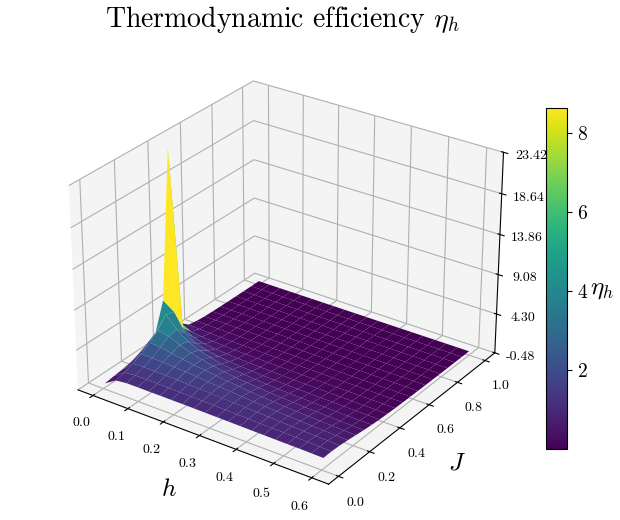

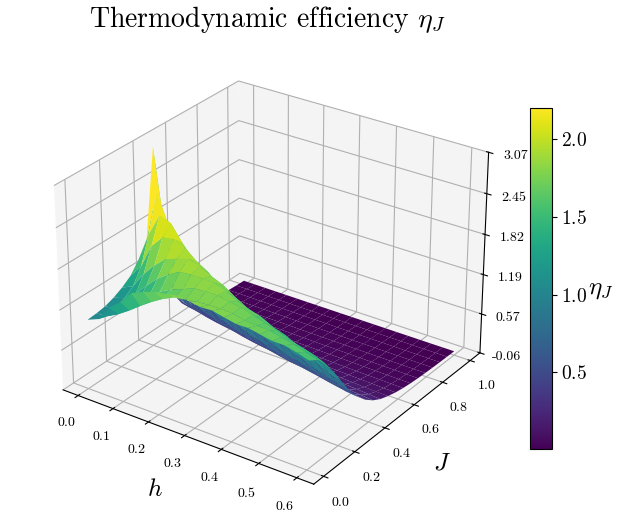

In [7]:
eta_cov_h, eta_cov_J = compute_eta2D_cov(data, subsample=[1,1])

plot_3d_eta(eta_cov_h, hs, Js, title=r'Thermodynamic efficiency $\eta_h$', zlabel=r'$\eta_h$');
plot_3d_eta(eta_cov_J, hs, Js, title=r'Thermodynamic efficiency $\eta_J$', zlabel=r'$\eta_J$');

## 2. Info-geometric form

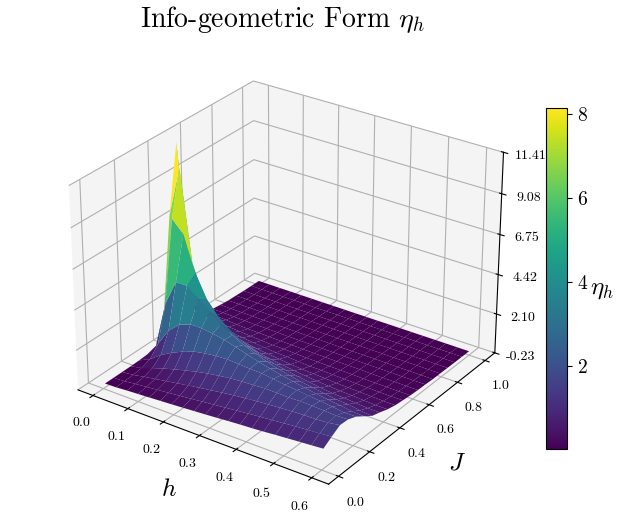

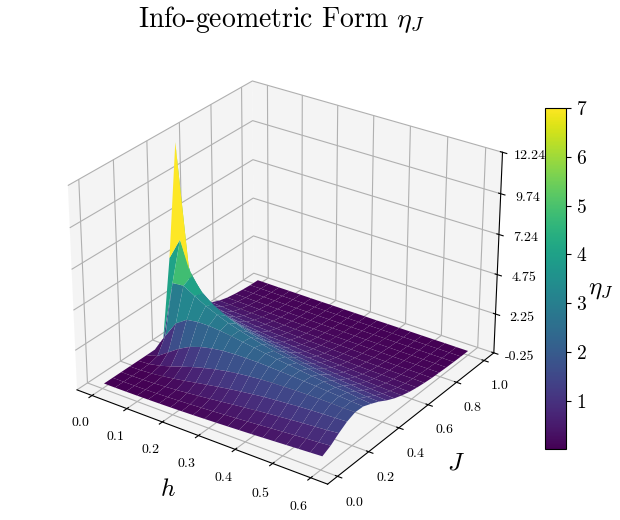

In [8]:
eta_fisher_h, eta_fisher_J = compute_eta2D_fisher(data, subsample=[1,1])

plot_3d_eta(eta_fisher_h, hs, Js, title=r'Info-geometric Form $\eta_h$', zlabel=r'$\eta_h$')
plot_3d_eta(eta_fisher_J, hs, Js, title=r'Info-geometric Form $\eta_J$', zlabel=r'$\eta_J$')

## 3. Computation form

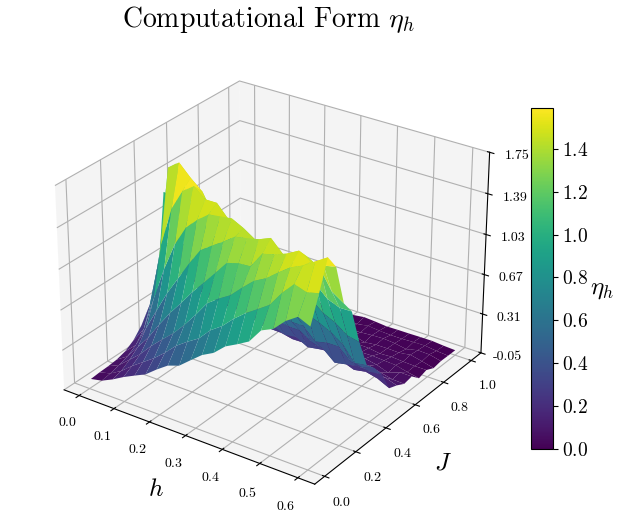

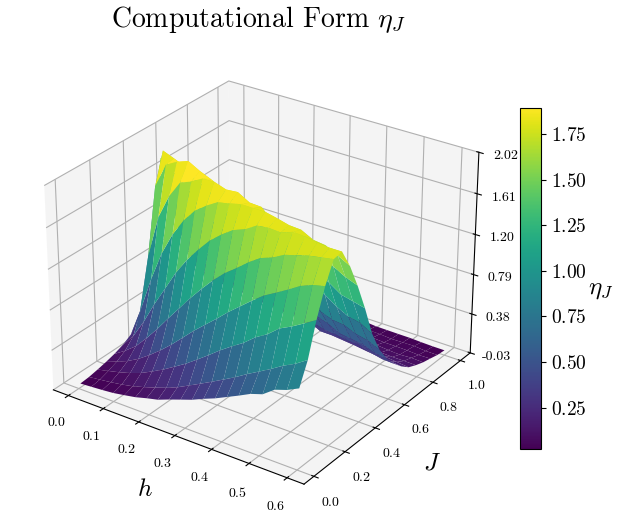

In [9]:
eta_derv_h, eta_derv_J = compute_eta2D_derv(data, subsample=[1,1])

plot_3d_eta(eta_derv_h, hs, Js, title=r'Computational Form $\eta_h$', zlabel=r'$\eta_h$')
plot_3d_eta(eta_derv_J, hs, Js, title=r'Computational Form $\eta_J$', zlabel=r'$\eta_J$')

## 4. Compare $\eta(J)$ for zero external field case

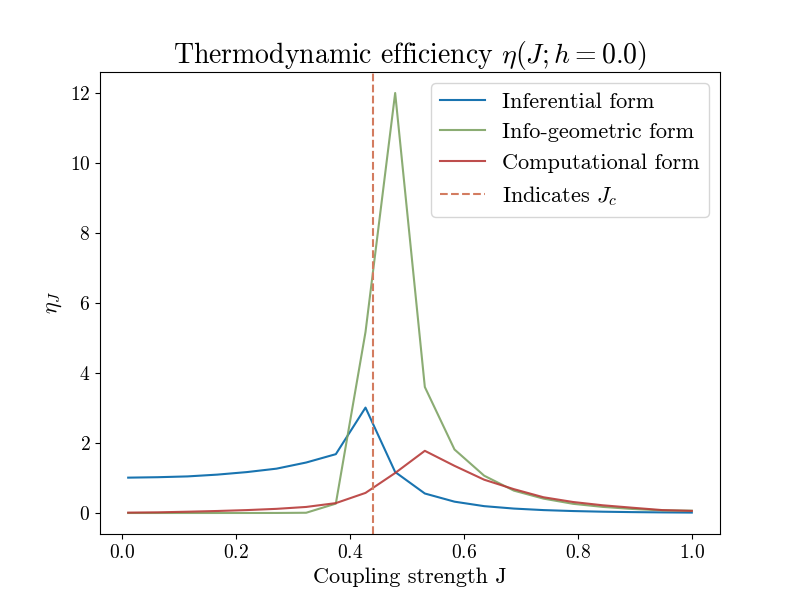

In [12]:
plt.figure(figsize=(8, 6))  # Define the figure size
h_idx = 0  # index for external field h=0 in the dataset
plt.plot(Js, eta_cov_J[h_idx,:], alpha=0.9, color=colors['blue'], label='Inferential form');
plt.plot(Js, eta_fisher_J[h_idx,:], alpha=0.9, color=colors['green'], label='Info-geometric form');
plt.plot(Js, eta_derv_J[h_idx,:], alpha=0.9, color=colors['red'], label='Computational form');
plt.axvline(x=CRITICAL_VALUE, linestyle='--', color=colors['orange'],label='Indicates $J_c$');
plt.xlabel('Coupling strength J');
plt.ylabel(r'$\eta_J$');
plt.title(r'Thermodynamic efficiency $\eta(J; h={%.1f})$' % hs[h_idx]);
plt.legend(fontsize=16);